In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


# **Data Iris 1**

In [8]:

import pymysql
import psycopg2
import numpy as np
import pandas as pd


def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-201e3cbe-sifa-190.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_LZy909DRs0jlZfh2C0Q",
        database="defaultdb",
        port=15434

    )
    cursor = conn.cursor()
    # cursor.execute("USE myiris")  # Use the database
    cursor.execute("SELECT * FROM irismysql")  # Select all records from the table
    data = cursor.fetchall()  # Fetch all rows

    conn.close()

    # Convert to Python list
    data_list = [list(row) for row in data]

    # Convert to NumPy array
    data_numpy = np.array(data_list)

    return data_list

    # print(len(data_list))
    # print(data_numpy)

get_mysql_data()



[[1, 'Iris-setosa', '1.4', '0.2'],
 [2, 'Iris-setosa', '1.4', '0.2'],
 [3, 'Iris-setosa', '1.3', '0.2'],
 [4, 'Iris-setosa', '1.5', '0.2'],
 [5, 'Iris-setosa', '1.4', '0.2'],
 [6, 'Iris-setosa', '1.7', '0.4'],
 [7, 'Iris-setosa', '1.4', '0.3'],
 [8, 'Iris-setosa', '1.5', '0.2'],
 [9, 'Iris-setosa', '1.4', '0.2'],
 [10, 'Iris-setosa', '1.5', '0.1'],
 [11, 'Iris-setosa', '1.5', '0.2'],
 [12, 'Iris-setosa', '1.6', '0.2'],
 [13, 'Iris-setosa', '1.4', '0.1'],
 [14, 'Iris-setosa', '1.1', '0.1'],
 [15, 'Iris-setosa', '1.2', '0.2'],
 [16, 'Iris-setosa', '1.5', '0.4'],
 [17, 'Iris-setosa', '1.3', '0.4'],
 [18, 'Iris-setosa', '1.4', '0.3'],
 [19, 'Iris-setosa', '1.7', '0.3'],
 [20, 'Iris-setosa', '1.5', '0.3'],
 [21, 'Iris-setosa', '1.7', '0.2'],
 [22, 'Iris-setosa', '1.5', '0.4'],
 [23, 'Iris-setosa', '1.0', '0.2'],
 [24, 'Iris-setosa', '1.7', '0.5'],
 [25, 'Iris-setosa', '1.9', '0.2'],
 [26, 'Iris-setosa', '1.6', '0.2'],
 [27, 'Iris-setosa', '1.6', '0.4'],
 [28, 'Iris-setosa', '1.5', '0.2'],
 

# **Data Iris2**

In [10]:
import psycopg2
import numpy as np

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3d261dbe-sifa-190.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_dFoBwFz1ZSfQpVx7DRi",
        database="defaultdb",
        port=15434

    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")  # Select all records from the table
    data = cursor.fetchall()  # Fetch all rows
    cursor.close()
    conn.close()

    # Convert to Python list
    data_list = [list(row) for row in data]

    # Convert to NumPy array
    data_numpy = np.array(data_list)
    # print(len(data_numpy))
    # print(data_numpy)
    return data_list

get_pg_data()


[[1, 'Iris-setosa', '5.1', '3.5'],
 [2, 'Iris-setosa', '4.9', '3.0'],
 [3, 'Iris-setosa', '4.7', '3.2'],
 [4, 'Iris-setosa', '4.6', '3.1'],
 [5, 'Iris-setosa', '5.0', '3.6'],
 [6, 'Iris-setosa', '5.4', '3.9'],
 [7, 'Iris-setosa', '4.6', '3.4'],
 [8, 'Iris-setosa', '5.0', '3.4'],
 [9, 'Iris-setosa', '4.4', '2.9'],
 [10, 'Iris-setosa', '4.9', '3.1'],
 [11, 'Iris-setosa', '5.4', '3.7'],
 [12, 'Iris-setosa', '4.8', '3.4'],
 [13, 'Iris-setosa', '4.8', '3.0'],
 [14, 'Iris-setosa', '4.3', '3.0'],
 [15, 'Iris-setosa', '5.8', '4.0'],
 [16, 'Iris-setosa', '5.7', '4.4'],
 [17, 'Iris-setosa', '5.4', '3.9'],
 [18, 'Iris-setosa', '5.1', '3.5'],
 [19, 'Iris-setosa', '5.7', '3.8'],
 [20, 'Iris-setosa', '5.1', '3.8'],
 [21, 'Iris-setosa', '5.4', '3.4'],
 [22, 'Iris-setosa', '5.1', '3.7'],
 [23, 'Iris-setosa', '4.6', '3.6'],
 [24, 'Iris-setosa', '5.1', '3.3'],
 [25, 'Iris-setosa', '4.8', '3.4'],
 [26, 'Iris-setosa', '5.0', '3.0'],
 [27, 'Iris-setosa', '5.0', '3.4'],
 [28, 'Iris-setosa', '5.2', '3.5'],
 

# **Menggabungkan Data dari dua database berbeda**


In [11]:
#  After fetching all the data needed from both databases, i merge the dataset in one dataframe now i need to get iris_setosa with thecolumnsepal_length sepal_width petal_length petal_width
import pandas as pd
# buat datafrrame

columns = ['id', 'Class', 'sepal_length', 'sepal_width']
data_mysql = pd.DataFrame(get_mysql_data(), columns=columns)

columns = ['id', 'Class', 'petal_length', 'petal_width']
data_pg = pd.DataFrame(get_pg_data(), columns=columns)

# print(data_mysql)

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(data_mysql, data_pg, on=["id", "Class"], how="inner")
print(df_merged)


    id        Class sepal_length sepal_width petal_length petal_width
0    1  Iris-setosa          1.4         0.2          5.1         3.5
1    2  Iris-setosa          1.4         0.2          4.9         3.0
2    3  Iris-setosa          1.3         0.2          4.7         3.2
3    4  Iris-setosa          1.5         0.2          4.6         3.1
4    5  Iris-setosa          1.4         0.2          5.0         3.6
5    6  Iris-setosa          1.7         0.4          5.4         3.9
6    7  Iris-setosa          1.4         0.3          4.6         3.4
7    8  Iris-setosa          1.5         0.2          5.0         3.4
8    9  Iris-setosa          1.4         0.2          4.4         2.9
9   10  Iris-setosa          1.5         0.1          4.9         3.1
10  11  Iris-setosa          1.5         0.2          5.4         3.7
11  12  Iris-setosa          1.6         0.2          4.8         3.4
12  13  Iris-setosa          1.4         0.1          4.8         3.0
13  14  Iris-setosa 

# **Profiling Data: Statistik Deskriptif**  

Statistik deskriptif digunakan untuk menganalisis dan merangkum karakteristik dataset secara kuantitatif. Tujuannya adalah untuk memahami distribusi data sebelum dilakukan analisis lebih lanjut.

---

# **Contoh Statistik Deskriptif untuk Dataset Iris**  

Misalkan kita memiliki dataset **Iris** dengan atribut:  
- **sepal_length** (Panjang sepal)  
- **sepal_width** (Lebar sepal)  
- **petal_length** (Panjang petal)  
- **petal_width** (Lebar petal)  
- **species** (Jenis bunga: Iris-setosa, Iris-versicolor, Iris-virginica)  

Berikut contoh statistik deskriptif dari dataset ini:

| Statistik       | Sepal Length | Sepal Width | Petal Length | Petal Width |
|---------------|-------------|------------|-------------|------------|
| **Count**     | 150         | 150        | 150         | 150        |
| **Mean**      | 5.84        | 3.05       | 3.76        | 1.20       |
| **Std Dev**   | 0.83        | 0.43       | 1.76        | 0.76       |
| **Min**       | 4.30        | 2.00       | 1.00        | 0.10       |
| **25% (Q1)**  | 5.10        | 2.80       | 1.60        | 0.30       |
| **50% (Median)** | 5.80    | 3.00       | 4.35        | 1.30       |
| **75% (Q3)**  | 6.40        | 3.30       | 5.10        | 1.80       |
| **Max**       | 7.90        | 4.40       | 6.90        | 2.50       |

---



In [12]:
print(df_merged.describe())

             id
count  50.00000
mean   25.50000
std    14.57738
min     1.00000
25%    13.25000
50%    25.50000
75%    37.75000
max    50.00000


#  **Mengeksplorasi data**
# visualisasi data

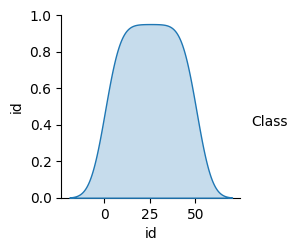

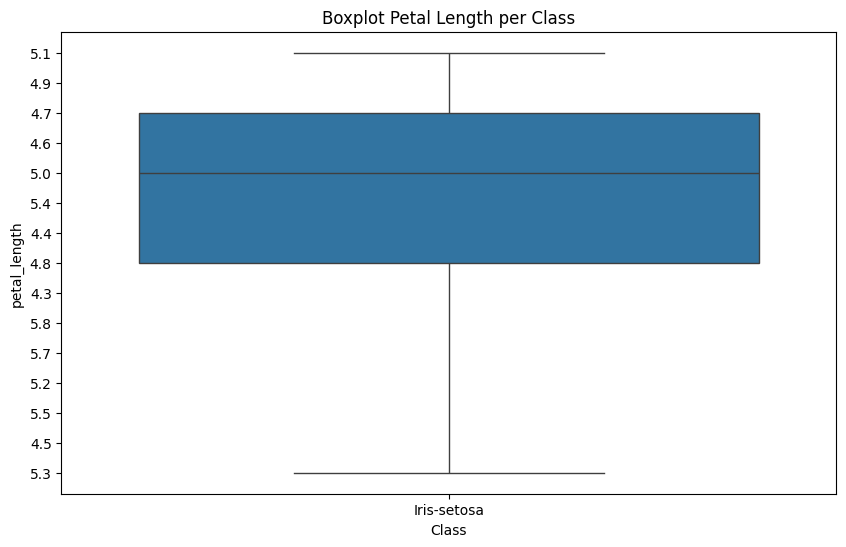

In [13]:

# visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt


# Scatter plot antar variabel

sns.pairplot(df_merged, hue="Class")
plt.show()

# Boxplot petal length per Class
plt.figure(figsize=(10, 6))
sns.boxplot(x="Class", y="petal_length", data=df_merged)
plt.title("Boxplot Petal Length per Class")
plt.show()